In [1]:
# loading libraries
import tensorflow as tf
import csv
import cv2
import matplotlib.image as mpimg
import numpy as np
import keras

lines=[]
images=[]

with open('./my_data/driving_log.csv') as csvfile: #Reading the csv file for the name and location of images
    reader=csv.reader(csvfile)
    for line in reader:
        lines.append(line)
lines=lines[1:]
print(len(lines))
print('Done')


Using TensorFlow backend.


8566
Done


In [2]:
images=[]
measurement=[]
steer=[]
#Sorting Center Camera Images 
for i in range(8566):
    source_path=lines[i][0] 
    filename=source_path.split('\\')[-1]
    #print(filename)
    current_path='./my_data/IMG/'+filename
    image=mpimg.imread(current_path)
    images.append(image)
    #Storing all the steer angles to center camera images
    measurement=float(lines[i][3]) 
    steer.append(measurement)
print('Done')
print(len(steer))



Done
8566


25698


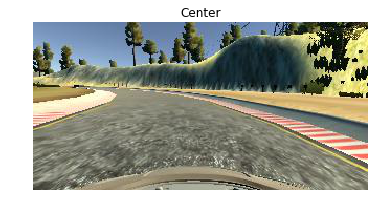

In [22]:
import matplotlib.pyplot as plt
print(len(images))
plt.imshow(images[1])
plt.axis('off')
plt.title('Center')
plt.show()



In [4]:
# Assume a steering correction of 0.25 to correct the left and right camera images
#Adding right and left images and steering measurements to training data
measurement_left = [0.25 + x for x in steer] #Including the steering correction for left image
measurement_right = [-0.25 + x for x in steer] #Including the steering correction for right image
steer = steer + measurement_left #Add these values to the steer angle array
print(len(steer))
steer = steer + measurement_right #Add these values to the steer angle array
print(len(steer))


#Sorting all the Left camera images
for i in range(8566):
    source_path = lines[i][1]
    #     print(source_path)
    filename = source_path.split('\\')[-1]
    current_path = './my_data/IMG/' + filename
    image = mpimg.imread(current_path) 
    #Appending left camera images
    images.append(image)

#Sorting all the Right camera images
for i in range(8566):
    source_path = lines[i][2]
    #     print(source_path)
    filename = source_path.split('\\')[-1]
    current_path = './my_data/IMG/' + filename
    image = mpimg.imread(current_path) 
    #Appending right camera images
    images.append(image)
print('Done')
print(images[1].shape)


17132
25698
Done
(160, 320, 3)


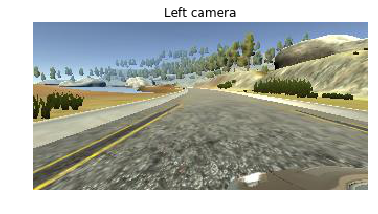

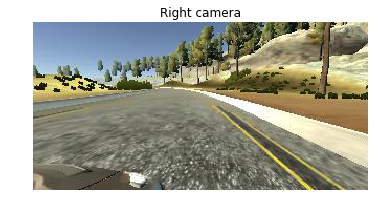

In [23]:
#visualize sample image
plt.imshow(images[10000])
plt.axis('off')
plt.title('Left camera')
plt.show()
plt.imshow(images[25000])
plt.axis('off')
plt.title('Right camera')
plt.show()


In [6]:
#import numpy as np
X_train=np.array(images) #Converting the list into array
y_train=np.array(steer) #Converting the list into array
print(len(X_train),len(y_train))
print('Done')

25698 25698
Done


In [7]:
#Build the NVIDIA Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Convolution2D, MaxPooling2D, Lambda, ELU, Dropout, Cropping2D
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Nvidia - Neural Network -modified version (Added Dense (1100))
model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3))) #Normalization of Data using a Lambda layer
model.add(Cropping2D(cropping=((50,20), (0,0)))) #Cropping the images to make it more easy for the neural network to classify
model.add(Convolution2D(24,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(36,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(48,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Flatten())
model.add(Dense(1100))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam') # Mean square Error loss function and Adam optimizer is used
history_object=model.fit(X_train ,y_train , validation_split=0.2, shuffle=True, nb_epoch=8) # 20% images used for validation, 8 EPOCHS
model.save('modelw.h5') 




Train on 20558 samples, validate on 5140 samples
Epoch 1/8
20558/20558 [==============================] - 71s - loss: 0.0420 - val_loss: 0.0913
Epoch 2/8
20558/20558 [==============================] - 63s - loss: 0.0303 - val_loss: 0.0631
Epoch 3/8
20558/20558 [==============================] - 63s - loss: 0.0272 - val_loss: 0.0586
Epoch 4/8
20558/20558 [==============================] - 63s - loss: 0.0243 - val_loss: 0.0511
Epoch 5/8
20558/20558 [==============================] - 63s - loss: 0.0216 - val_loss: 0.0496
Epoch 6/8
20558/20558 [==============================] - 63s - loss: 0.0189 - val_loss: 0.0415
Epoch 7/8
20558/20558 [==============================] - 63s - loss: 0.0166 - val_loss: 0.0508
Epoch 8/8
20558/20558 [==============================] - 63s - loss: 0.0148 - val_loss: 0.0443


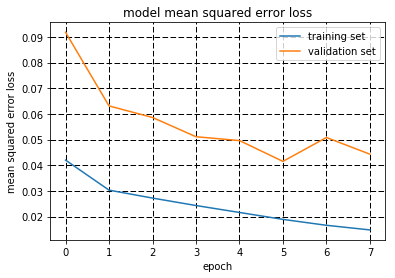

In [17]:
loss = [0.0420, 0.0303, 0.0272,0.0243,0.0216,0.0189,0.0166,0.0148]
valid_loss = [0.0918, 0.0631, 0.0586,0.0511,0.0496,0.0415,0.0508,0.0443]
## plot the training and validation loss for each epoch
plt.plot(loss)
plt.plot(valid_loss)
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()